In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("./../../data/regData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       600 non-null    int64  
 1   Y       600 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


In [15]:
df.head()

,X,Y
0,1,1.018138
1,2,0.813685
2,3,0.795484
3,4,0.860005
4,5,0.990648


In [18]:
X = df['X']
y = df['Y']

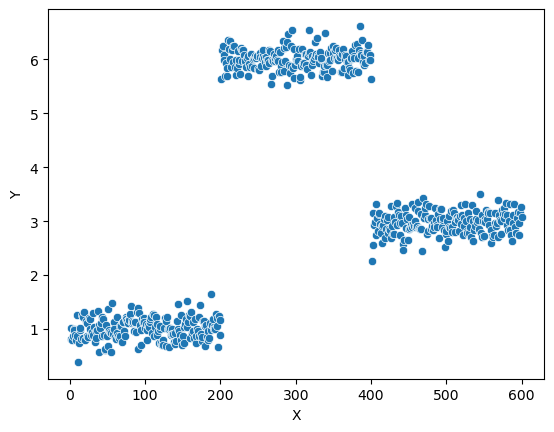

In [26]:
sns.scatterplot(data=df, x=X,y=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=43,
                                                    shuffle = True)

In [47]:
X_train =  X_train.values.reshape(-1,1)
y_train= y_train.values

In [48]:
X_train.shape, X_train_01.shape


((450, 1), (450, 1))

In [65]:
train_score = []
validation_score = []
depths = [1,2,3,5,6,7,9,11]
for depth in depths:
    tree_reg = DecisionTreeRegressor(random_state=7, max_depth = depth, min_samples_split = 10, min_samples_leaf = 20)
    kfold = KFold(n_splits=3 )
    cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error',  return_train_score = True)
    print(f"K-Fold for depth:{depth}  MSE Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print('***************')
    
    train_score.append(cv_acc_results['train_score'].mean())
    validation_score.append(cv_acc_results['test_score'].mean())

K-Fold for depth:1  MSE Mean: Train: -157.29484407813618 Validation: -161.85220982964185
***************
K-Fold for depth:2  MSE Mean: Train: -4.022779524301007 Validation: -13.41631105078697
***************
K-Fold for depth:3  MSE Mean: Train: -3.889896491712604 Validation: -13.530023054703413
***************
K-Fold for depth:5  MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:6  MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:7  MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:9  MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:11  MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************


In [66]:
train_score = np.array(train_score)
validation_score = np.array(validation_score)

train_score = train_score * -1
validation_score = validation_score * -1

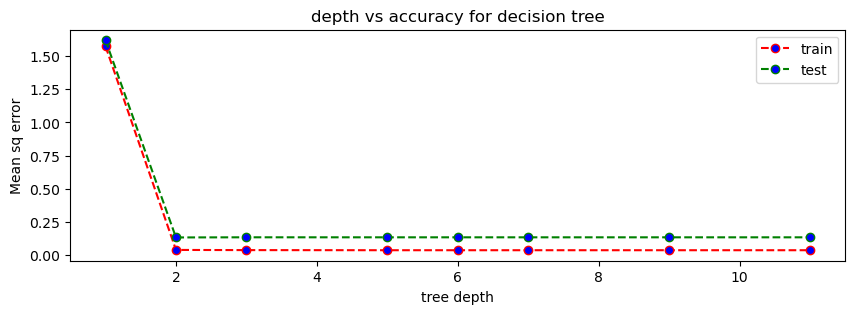

In [67]:
plt.figure(figsize=(10, 3))
plt.plot(depths, train_score, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', label='train')
plt.plot(depths, validation_score, color='green', linestyle='dashed', marker='o',markerfacecolor='blue', label='test')
plt.title('depth vs accuracy for decision tree')
plt.xlabel('tree depth')
plt.ylabel('Mean sq error')
plt.legend()
plt.show()

In [68]:
np.array(train_score)*-1

array([-1.57294844, -0.0402278 , -0.03889896, -0.0380291 , -0.0380291 ,
       -0.0380291 , -0.0380291 , -0.0380291 ])

In [76]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [82]:
tree_reg = DecisionTreeRegressor(random_state=7, max_depth = 2, min_samples_split = 10, min_samples_leaf = 20)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=20, min_samples_split=10,
                      random_state=7)

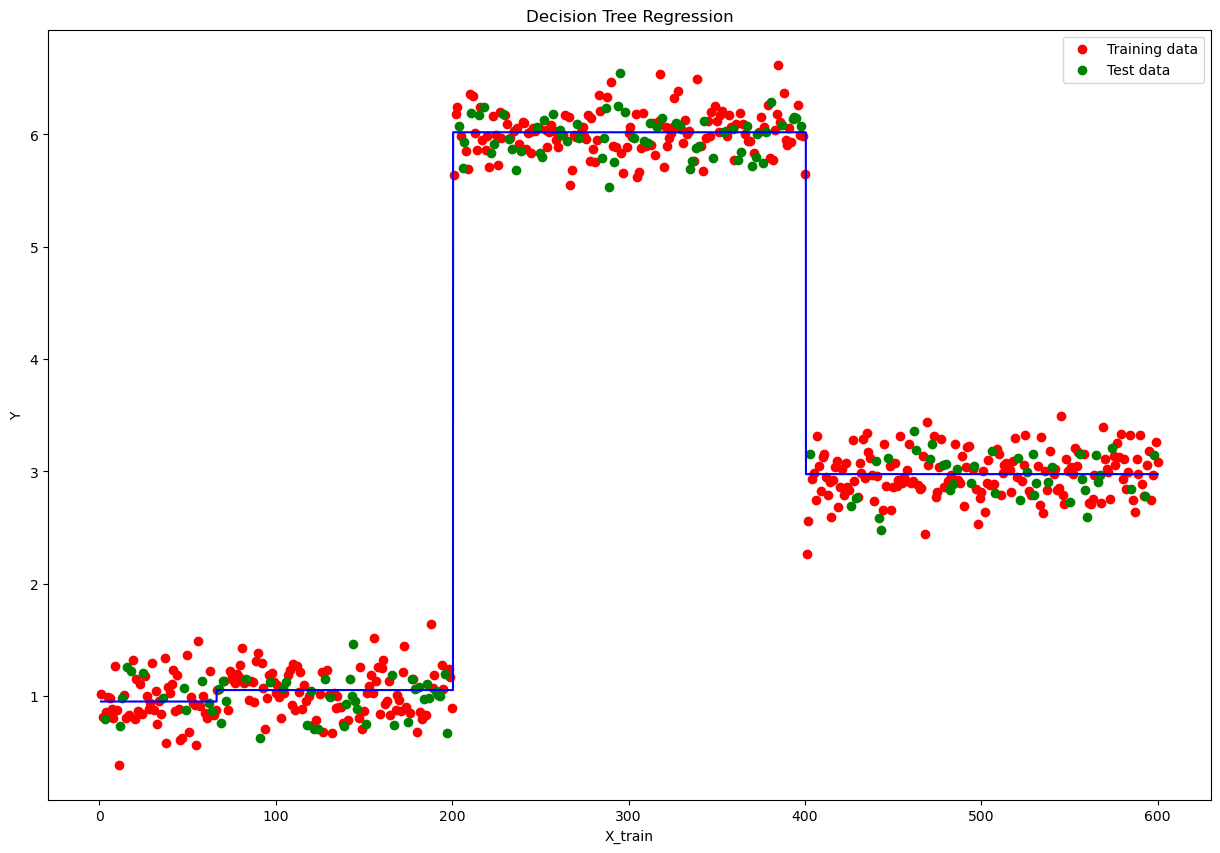

In [85]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (15,10))
plt.scatter(X_train, y_train, color = 'red', label = 'Training data')
plt.scatter (X_test, y_test, color = 'green', label = 'Test data')
plt.plot(X_grid, tree_reg.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('X_train')
plt.ylabel('Y')
plt.legend()
plt.show()